In [1]:
import numpy as np

from qiskit import QuantumCircuit, transpile, Aer, execute, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import AerSimulator



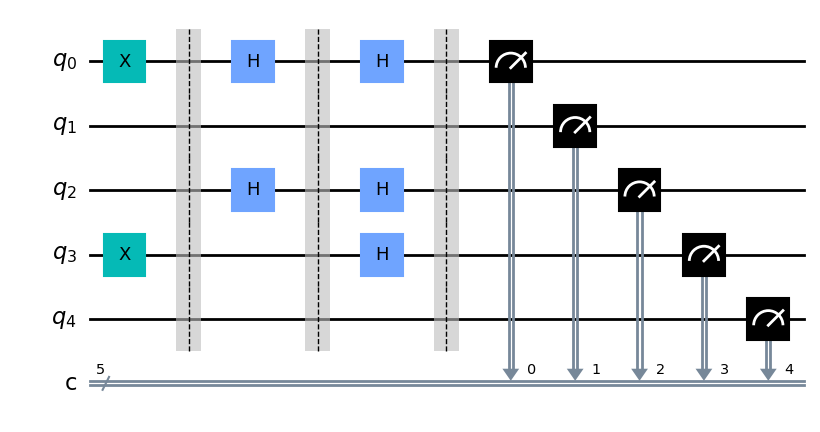

In [2]:


# Bit string
circ = QuantumCircuit(5, 5)
circ.x(0)
circ.x(3)
circ.barrier()

#Alice basis
circ.h(0)
circ.h(2) 
circ.barrier()
#Bob's basis
circ.h(0) 
circ.h(2)
circ.h(3)
circ.barrier()
circ.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
circ.draw()


{'00001': 504, '01001': 520}


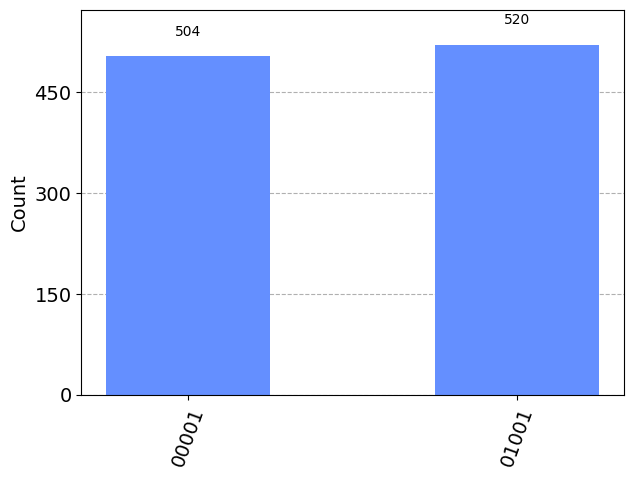

In [3]:
backend=AerSimulator(method='density_matrix')  #simulation is done in density matrix
job=execute(circ,backend,shots=1024)
#job=execute(circ,backend)
result=job.result()
count=result.get_counts(circ)
print(count)
plot_histogram(count)

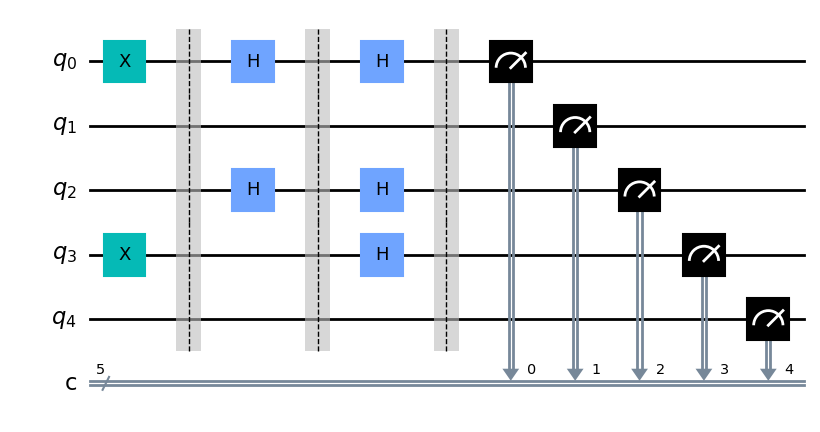

In [4]:

import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import pauli_error

noise_bit_flip=noise.NoiseModel()
# Error probabilities
p_error = 0.1 #10% bit flip noise applied
bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])


# Make a circuit
circ = QuantumCircuit(5, 5)
circ.x(0)
circ.x(3)
circ.barrier()

#Alice basis
circ.h(0)
circ.h(2) 
circ.barrier()
#Bob's basis
circ.h(0) 
circ.h(2)
circ.h(3)
circ.barrier()

# Add errors to noise model

noise_bit_flip.add_all_qubit_quantum_error(bit_flip, ['x', 'h'])


# Get basis gates from noise model
basis_gates = noise_bit_flip.basis_gates


circ.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
circ.draw()


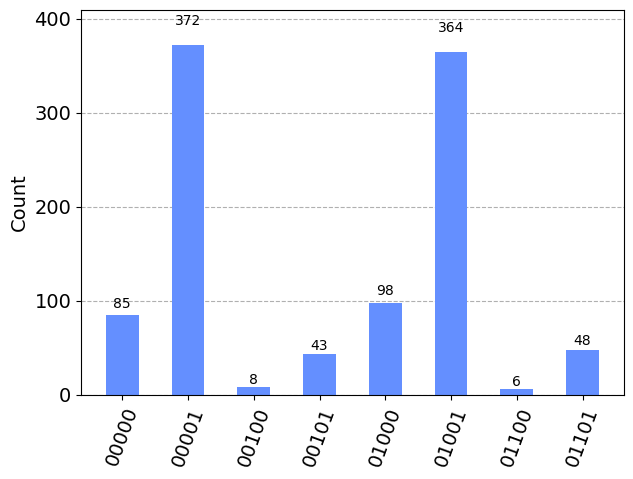

In [5]:
backend=AerSimulator(method='density_matrix',noise_model=noise_bit_flip) # simulation of bit flip noise in density matrix
job=execute(cir,backend)
job=execute(circ,backend)
result=job.result()
count=result.get_counts(circ)
plot_histogram(count)